# DSC 478 Final Project 
# Food recipe recommendation

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
from numpy import *

import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
epi_frame = pd.read_csv('epi_clean.csv').iloc[:,1:]
epi_frame.head()

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
0,Ham Persillade with Mustard Potato Salad and M...,0.750,0.024962,0.024289,0.016850,0.018402,0.012846,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Banana-Chocolate Chip Cake With Peanut Butter ...,0.875,0.031762,0.049271,0.008791,0.021544,0.003325,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sweet Buttermilk Spoon Breads,0.375,0.006054,0.014573,0.002930,0.002244,0.001212,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Tuna, Asparagus, and New Potato Salad with Chi...",1.000,0.017457,0.014573,0.007326,0.014811,0.002901,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cucumber-Basil Egg Salad,0.750,0.008915,0.001388,0.004396,0.008977,0.001894,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
epi_frame.describe()

,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,appetizer,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
count,6742.000000,6742.000000,6742.000000,6738.000000,6735.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,...,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,0.770561,0.022971,0.032073,0.015043,0.014247,0.004986,0.051913,0.003856,0.006526,0.155147,...,0.003856,0.014239,0.003263,0.033966,0.004153,0.004153,0.018985,0.024622,0.014091,0.014684
std,0.241802,0.033660,0.048872,0.030890,0.027930,0.021213,0.221869,0.061985,0.080527,0.362071,...,0.061985,0.118484,0.057035,0.181156,0.064315,0.064315,0.136484,0.154981,0.117874,0.120294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.009910,0.011103,0.002930,0.004488,0.000659,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.875000,0.016047,0.022901,0.005861,0.008977,0.001947,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,0.025998,0.038862,0.016850,0.016158,0.005044,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from wordcloud import WordCloud

In [21]:
#create a dataframe for breakfast, lunch and dinner for title wordclound

meal_category_frame = epi_frame[['title', 'breakfast','lunch','dinner']]
meal_category_frame.head()

,title,breakfast,lunch,dinner
0,Ham Persillade with Mustard Potato Salad and M...,0,1,0
1,Banana-Chocolate Chip Cake With Peanut Butter ...,0,0,0
2,Sweet Buttermilk Spoon Breads,1,0,0
3,"Tuna, Asparagus, and New Potato Salad with Chi...",0,1,0
4,Cucumber-Basil Egg Salad,0,1,1


# General Plotting for Calories, fat, carbs, protein, sodium

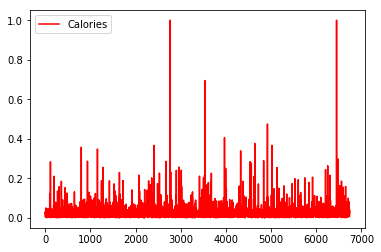

In [75]:
# Calories line plot for distribution of calories in all the meals
# color code: caleries: red; fat: green; Carbs: blue; protein: yellow; sodium: orange

# 
plt.plot('calories', data= epi_frame, color = 'red', label="Calories")

plt.legend()

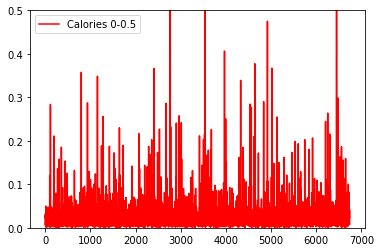

In [79]:
plt.plot('calories', data= epi_frame, color = 'red', label="Calories 0-0.5")
plt.ylim(0, 0.5)
plt.legend()

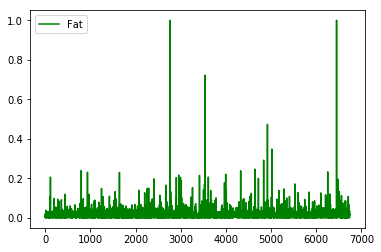

In [82]:
# color code: caleries: red; fat: green; Carbs: blue; protein: yellow; sodium: orange

# plot fat distribution on a normal scale (0 - 10)
plt.plot('fat', data= epi_frame, color = 'green', label="Fat")

plt.legend()

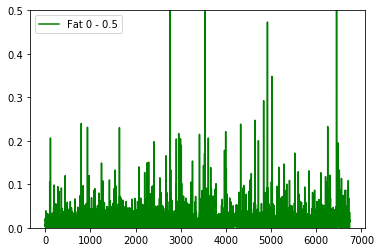

In [83]:
# plot fat distribution on a scale of 0 - 0.5
plt.plot('fat', data= epi_frame, color = 'green', label="Fat 0 - 0.5")
plt.ylim(0, 0.5)
plt.legend()

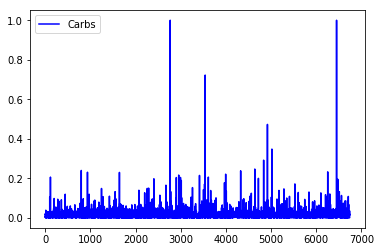

In [85]:
# color code: caleries: red; fat: green; Carbs: blue; protein: yellow; sodium: orange

# plot Carbs on normal scale of 0 - 10
plt.plot('fat', data= epi_frame, color = 'blue', label="Carbs")
plt.legend()


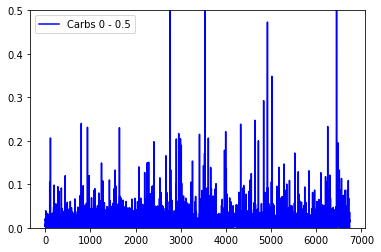

In [87]:
# plot Carbs on normal scale of 0 - 10
plt.plot('fat', data= epi_frame, color = 'blue', label="Carbs 0 - 0.5")
plt.ylim(0, 0.5)
plt.legend()

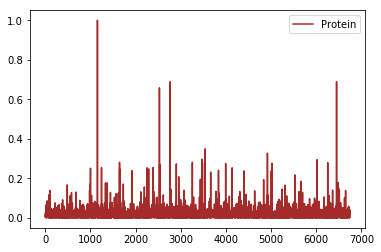

In [89]:
# color code: caleries: red; fat: green; Carbs: blue; protein: yellow; sodium: orange

# plot protein on a normal scale of 0 - 10
plt.plot('protein', data= epi_frame, color = 'brown', label="Protein")
plt.legend()

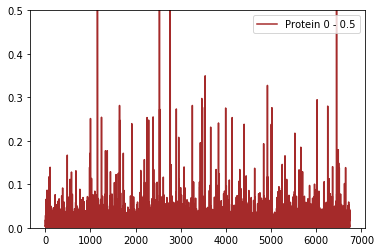

In [91]:
# plot protein on a scale of 0 - 5
plt.plot('protein', data= epi_frame, color = 'brown', label="Protein 0 - 0.5")
plt.ylim(0, 0.5)
plt.legend()

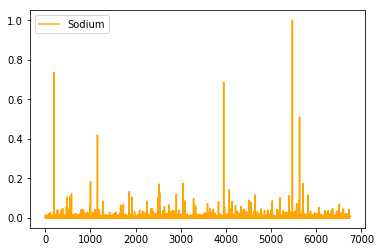

In [92]:
# plot sodium on a normal scale of 0 - 10
plt.plot('sodium', data= epi_frame, color = 'orange', label="Sodium")
plt.legend()

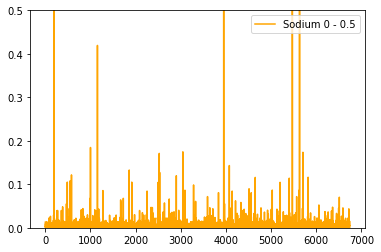

In [94]:
# plot sodium on a scale of 0 - 0.5
plt.plot('sodium', data= epi_frame, color = 'orange', label="Sodium 0 - 0.5")
plt.ylim(0, 0.5)
plt.legend()

correlation plot

In [255]:
corr_frame = epi_frame.iloc[:, 1:7]
corr_frame.head()

,rating,calories,carbs,protein,fat,sodium
0,0.750,0.024962,0.024289,0.016850,0.018402,0.012846
1,0.875,0.031762,0.049271,0.008791,0.021544,0.003325
2,0.375,0.006054,0.014573,0.002930,0.002244,0.001212
3,1.000,0.017457,0.014573,0.007326,0.014811,0.002901
4,0.750,0.008915,0.001388,0.004396,0.008977,0.001894


In [256]:
corr_frame.corr()

,rating,calories,carbs,protein,fat,sodium
rating,1.000000,0.029443,-0.014233,0.035162,0.039260,0.012931
calories,0.029443,1.000000,0.612012,0.688047,0.935020,0.177232
carbs,-0.014233,0.612012,1.000000,0.155739,0.337298,0.096488
protein,0.035162,0.688047,0.155739,1.000000,0.618207,0.303150
fat,0.039260,0.935020,0.337298,0.618207,1.000000,0.117111
sodium,0.012931,0.177232,0.096488,0.303150,0.117111,1.000000


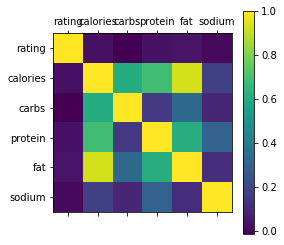

In [266]:
plt.matshow(corr_frame.corr())
plt.xticks(range(len(corr_frame.columns)), corr_frame.columns)
plt.yticks(range(len(corr_frame.columns)), corr_frame.columns)

plt.colorbar()
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


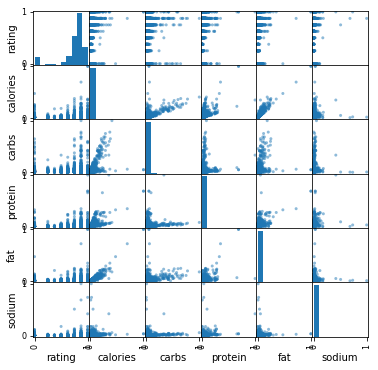

In [261]:
pd.scatter_matrix(corr_frame, figsize=(6, 6))
plt.show()

# Plotting for general Rating by variables

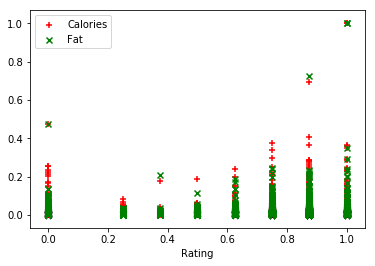

In [126]:
# color code: caleries: red; fat: green; Carbs: blue; protein: yellow; sodium: orange
# plot multiple line plot using rating, calories, carbs, protein, fat, sodium to observe patterns
# for rating

plt.scatter('rating', 'calories', data = epi_frame, marker = '+', color='red', label = 'Calories')
plt.scatter('rating', 'fat', data=epi_frame, marker = 'x', color = 'green', label = 'Fat')
plt.xlabel("Rating")

plt.legend()




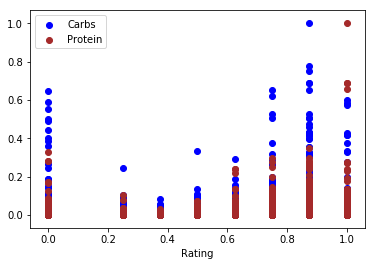

In [132]:
plt.scatter('rating', 'carbs', data=epi_frame, color='blue', label = 'Carbs')
plt.scatter('rating', 'protein', data = epi_frame, color='brown', label = 'Protein')


plt.xlabel("Rating")
plt.legend()

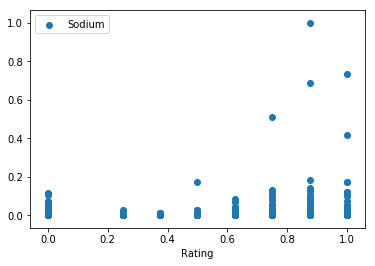

In [262]:
plt.scatter('rating', 'sodium', data=epi_frame, label = 'Sodium')


plt.xlabel("Rating")
plt.legend()

# Plotting for breakfast items 

In [111]:
# create breakfast dataframe
breakfast_frame = epi_frame[(epi_frame[['breakfast']] != 0).all(axis=1)]
breakfast_frame.shape

(755, 217)

In [112]:
breakfast_frame

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
2,Sweet Buttermilk Spoon Breads,0.375,0.006054,0.014573,0.002930,0.002244,0.001212,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Citrus Salad with Mint Sugar,0.875,0.007920,0.029146,0.002198,0.000449,0.000030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Peanut Butter-Banana Muffins,0.750,0.011403,0.022901,0.004396,0.005835,0.001833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Pumpkin Muffins,0.875,0.009247,0.020125,0.002930,0.004488,0.001598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,Apricot-Pistachio Muffins Baked on the Grill,1.000,0.010242,0.023595,0.003663,0.004488,0.001401,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,"Cranberry, Quince, and Pearl Onion Compote",0.750,0.007090,0.028452,0.000733,0.000000,0.000045,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Blueberry Streusel Cake,0.750,0.011942,0.028452,0.002930,0.005386,0.001507,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,JalapeÍ±o-Cheddar Frittata,0.875,0.005805,0.000694,0.006593,0.004937,0.001394,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,Banana Smoothie,0.000,0.005722,0.018737,0.002198,0.000898,0.000159,0,0,0,...,0,0,0,0,0,0,0,1,0,0
76,Banana Coffee Cake Diamond,0.750,0.011320,0.025677,0.002930,0.005386,0.002068,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plot breakfast ratings by diffent nutri facts

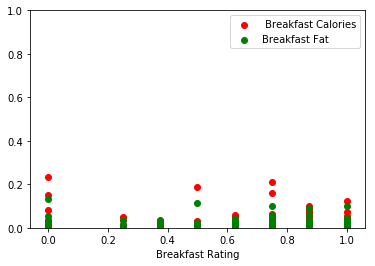

In [268]:
# color code: caleries: red;  fat: green;  Carbs: blue;  protein: yellow;  sodium: orange
# plot multiple line plot using rating, calories, carbs, protein, fat, sodium to observe patterns
# for breakfast rating 

plt.scatter('rating', 'calories', data = breakfast_frame, color='red', label = ' Breakfast Calories')
plt.scatter('rating', 'fat', data=breakfast_frame, color = 'green', label = 'Breakfast Fat')
plt.xlabel("Breakfast Rating")
plt.ylim(0, 1)
plt.legend()


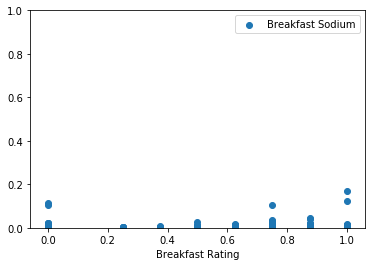

In [267]:
plt.scatter('rating', 'sodium', data=breakfast_frame, label = 'Breakfast Sodium')
plt.xlabel("Breakfast Rating")
plt.ylim(0, 1)
plt.legend()

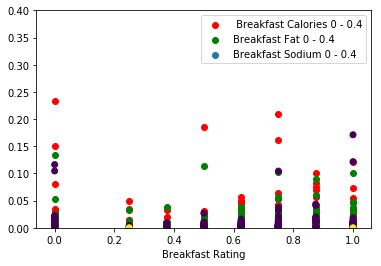

In [137]:
# plot multiple line plot using rating, calories, carbs, protein, fat, sodium to observe patterns
# scale 0 - 0.4
# for breakfast rating 

plt.scatter('rating', 'calories', data = breakfast_frame, color='red', label = ' Breakfast Calories 0 - 0.4')
plt.scatter('rating', 'fat', data=breakfast_frame, color = 'green', label = 'Breakfast Fat 0 - 0.4')
plt.scatter('rating', 'sodium', data=breakfast_frame, c= 'orange', label = 'Breakfast Sodium 0 - 0.4')
plt.xlabel("Breakfast Rating")
plt.ylim(0, 0.4)
plt.legend()

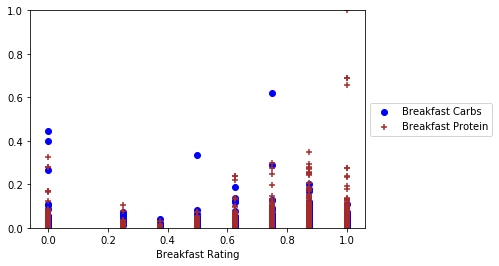

In [176]:
plt.scatter('rating', 'carbs', data=breakfast_frame, color='blue', label = 'Breakfast Carbs')
plt.scatter('rating', 'protein', data = epi_frame, color='brown', marker = '+', label = 'Breakfast Protein')
plt.xlabel("Breakfast Rating")
plt.ylim(0,1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100 of top rated breakfast items 

In [166]:
# look at top rated items for breakfast
breakfast_top_rated100 = breakfast_frame.nlargest(100, 'rating')
breakfast_top_rated100

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
32,Apricot-Pistachio Muffins Baked on the Grill,1.0,0.010242,0.023595,0.003663,0.004488,0.001401,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,Breakfast Bowl With Quinoa and Berries,1.0,0.007173,0.015267,0.003663,0.003142,0.000023,1,0,0,...,0,0,0,0,0,0,0,0,0,0
149,Haricots Verts With Poached Eggs And Tarragon ...,1.0,0.013020,0.004164,0.008059,0.012118,0.003666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Wild Mushroom Pierogies,1.0,0.006551,0.007634,0.002198,0.004937,0.000288,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,Chile-and-Olive-Oil-Fried Egg with Avocado and...,1.0,0.009951,0.002082,0.006593,0.009425,0.001841,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,Shishito Pepper Potato Hash with Fried Eggs,1.0,0.014678,0.018737,0.011722,0.008977,0.004355,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,Diner-Style Western Omelet,1.0,0.004893,0.000694,0.007326,0.003591,0.003363,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,Sweet-Potato Pancakes with Honey-Cinnamon Butter,1.0,0.016420,0.024289,0.007326,0.010772,0.004598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,Yukon Gold and Sweet Potato Home Fries,1.0,0.012274,0.036086,0.004396,0.003142,0.003878,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,"Frittata Bites with Chard, Sausage, and Feta",1.0,0.004603,0.000694,0.004396,0.004039,0.002045,0,0,0,...,0,0,0,0,0,0,0,0,0,0


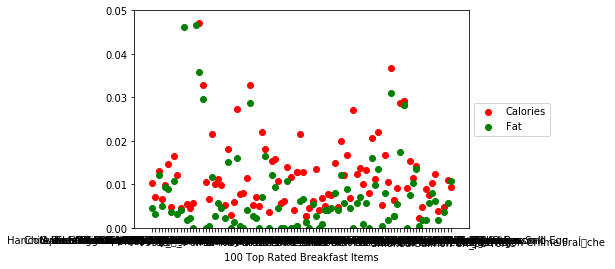

In [194]:
plt.scatter('title', 'calories', data = breakfast_top_rated100, color='red', label = 'Calories')
plt.scatter('title', 'fat', data=breakfast_top_rated100, color = 'green', label = 'Fat')
plt.xlabel("100 Top Rated Breakfast Items")
plt.ylim(0,0.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

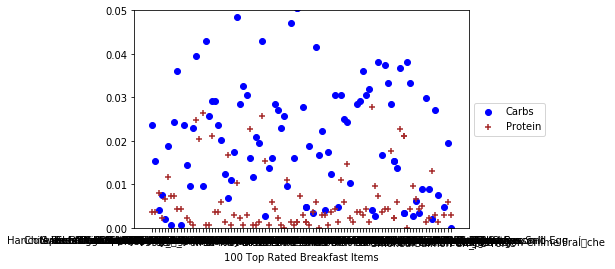

In [195]:
plt.scatter('title', 'carbs', data = breakfast_top_rated100, color='blue', label = 'Carbs')
plt.scatter('title', 'protein', data = breakfast_top_rated100, color='brown', marker = '+', label = 'Protein')

plt.xlabel("100 Top Rated Breakfast Items")
plt.ylim(0,0.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

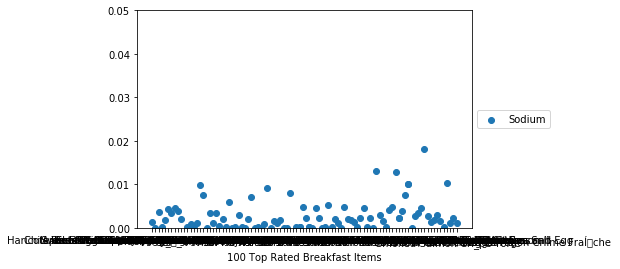

In [196]:
plt.scatter('title', 'sodium', data =breakfast_top_rated100, label = 'Sodium')

plt.xlabel("100 Top Rated Breakfast Items")
plt.ylim(0,0.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Word cloud breakfast

In [210]:
text = breakfast_top_rated100.title
#text

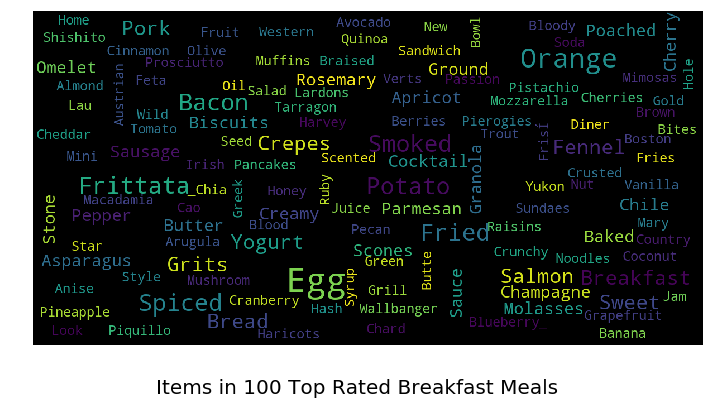

In [228]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = "Items in 100 Top Rated Breakfast Meals"):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=130,
        max_font_size=20, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(breakfast_top_rated100.title)



# Wordcloud lunch 

In [220]:
# create data frame for lunch 
lunch_frame = epi_frame[(epi_frame[['lunch']] != 0).all(axis=1)]
lunch_frame.shape

(939, 217)

In [221]:
breakfast_frame.shape

(755, 217)

100 of top rated lunch items 

In [223]:
# look at top rated items for breakfast
lunch_top_rated100 = lunch_frame.nlargest(100, 'rating')
lunch_top_rated100

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
3,"Tuna, Asparagus, and New Potato Salad with Chi...",1.0,0.017457,0.014573,0.007326,0.014811,0.002901,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Radishes with Burrata,1.0,0.009744,0.002082,0.009524,0.008528,0.002939,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,Hamburger Soup,1.0,0.017747,0.024289,0.017582,0.009425,0.003371,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",1.0,0.025003,0.048577,0.022711,0.009874,0.006567,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Wild Mushroom Pierogies,1.0,0.006551,0.007634,0.002198,0.004937,0.000288,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,"'Wichcraft's Roasted Turkey, Avocado, Bacon, O...",1.0,0.058258,0.069396,0.040293,0.039048,0.010119,0,0,0,...,0,0,0,0,0,0,0,0,0,1
258,Tuscan Tuna Salad with Fennel,1.0,0.018825,0.009715,0.016850,0.015260,0.002977,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,Ceviche AcapulqueÍ±o,1.0,0.009661,0.004858,0.012454,0.006732,0.001166,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,Pork and Chive Dumplings with Dried Shrimp,1.0,0.003110,0.004164,0.002198,0.001795,0.001545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,"Greens with Bacon, Mushrooms, and Blue Cheese",1.0,0.007256,0.002776,0.004396,0.006732,0.001613,0,0,0,...,0,0,0,0,0,0,0,0,0,0


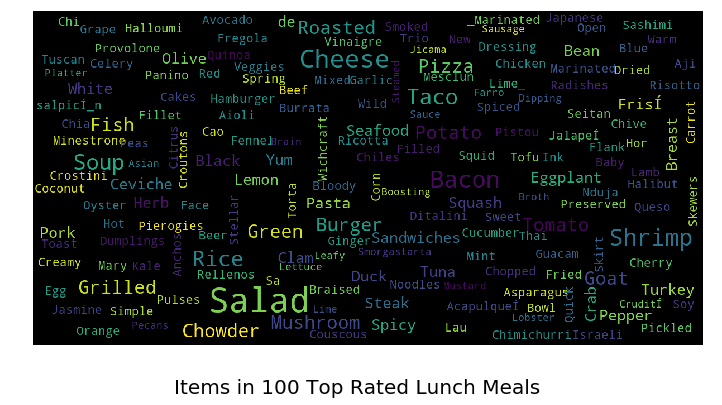

In [227]:
def lunch_wordcloud(data, title = "Items in 100 Top Rated Lunch Meals"):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=180,
        max_font_size=20, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

lunch_wordcloud(lunch_top_rated100.title)

# Wordcloud Dinner

In [229]:
# create data frame for dinner 
dinner_frame = epi_frame[(epi_frame[['dinner']] != 0).all(axis=1)]
dinner_frame.shape

(1896, 217)

In [230]:
# look at top rated items for dinner
dinner_top_rated100 = dinner_frame.nlargest(100, 'rating')
dinner_top_rated100

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
11,Pancetta Roast Chicken with Walnut Stuffing,1.0,0.049882,0.011103,0.065201,0.039048,0.004416,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,Chicken and Sausage Jambalaya,1.0,0.046316,0.045108,0.041026,0.031418,0.012361,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,"Rib-Eye Steaks with Radicchio, Pear, and Blue ...",1.0,0.039143,0.011797,0.036630,0.033662,0.002878,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,"Minty, Boozy Chicken",1.0,0.025169,0.015961,0.026374,0.018402,0.001083,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,Chicken Tikka Masala,1.0,0.028486,0.009715,0.027839,0.023788,0.010233,0,0,0,...,0,0,0,0,0,0,0,1,0,0
155,"Grilled Butterflied Leg of Lamb with Lemon, He...",1.0,0.023718,0.002776,0.033700,0.018402,0.006506,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,Hamburger Soup,1.0,0.017747,0.024289,0.017582,0.009425,0.003371,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",1.0,0.025003,0.048577,0.022711,0.009874,0.006567,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,Pork Chile Verde with Red Chile Salsa,1.0,0.017871,0.015267,0.018315,0.012118,0.001621,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Wild Mushroom Pierogies,1.0,0.006551,0.007634,0.002198,0.004937,0.000288,0,0,0,...,0,0,0,0,0,0,0,0,0,0


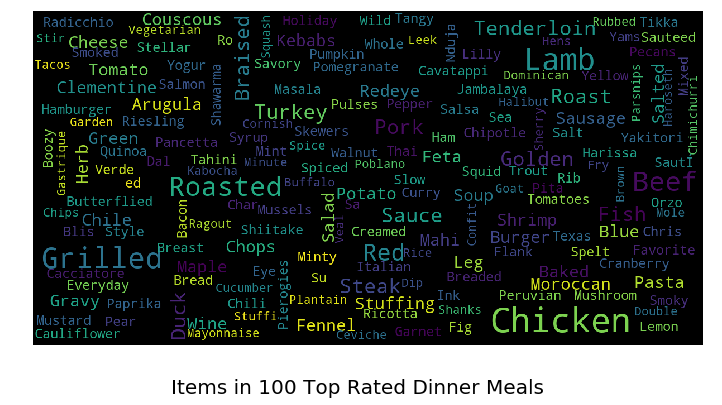

In [231]:
def dinner_wordcloud(data, title = "Items in 100 Top Rated Dinner Meals"):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=180,
        max_font_size=20, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dinner_wordcloud(dinner_top_rated100.title)

# Wordcloud Dessert 

In [232]:
# create data frame for dessert 
dessert_frame = epi_frame[(epi_frame[['dessert']] != 0).all(axis=1)]
dessert_frame.shape

(2954, 217)

In [233]:
# look at top rated items for dessert
dessert_top_rated100 = dessert_frame.nlargest(100, 'rating')
dessert_top_rated100

,title,rating,calories,carbs,protein,fat,sodium,almond,amaretto,anise,...,veal,vinegar,vodka,walnut,watercress,watermelon,white wine,yogurt,zucchini,turkey
49,Blueberry Cheesecake,1.0,0.039557,0.052741,0.010256,0.029623,0.005810,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,Honey-Cinnamon Ice Cream,1.0,0.009951,0.015267,0.001465,0.007181,0.000560,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,Classic Coconut Cake,1.0,0.035659,0.074948,0.005861,0.019749,0.002598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,Icy Lemon-Mint Parfaits,1.0,0.009495,0.028452,0.001465,0.002693,0.000136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,Toffee Sauce,1.0,0.016378,0.023595,0.000733,0.012567,0.000667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,Lemon Cornmeal Cake with Lemon Glaze and Crush...,1.0,0.016793,0.045802,0.004396,0.005835,0.002901,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Vanilla Cheesecake Tartlets with Vanilla-Vodka...,1.0,0.013061,0.022901,0.002198,0.008528,0.001977,0,0,0,...,0,0,1,0,0,0,0,0,0,0
160,Giant Chocolate Candy Bar With Peanuts and Nou...,1.0,0.037691,0.100625,0.021978,0.010323,0.009862,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,Chocolate Marshmallow Eggs,1.0,0.002820,0.009022,0.000733,0.000449,0.000038,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,Flourless Pistachio Cake with Strawberry Merin...,1.0,0.019074,0.028452,0.010989,0.011670,0.000500,0,0,0,...,0,0,0,0,0,0,0,0,0,0


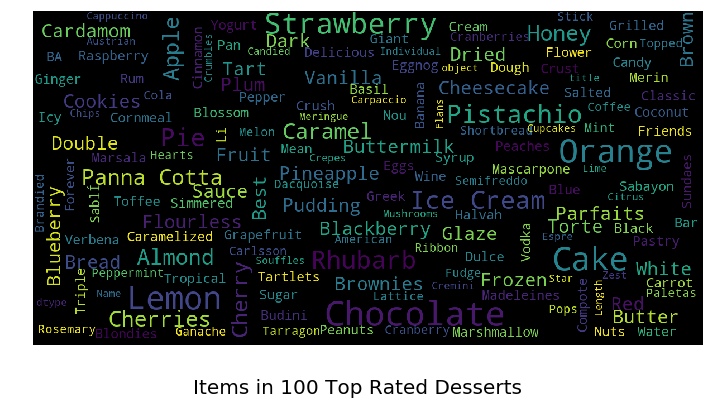

In [234]:
def dessert_wordcloud(data, title = "Items in 100 Top Rated Desserts"):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=180,
        max_font_size=20, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dessert_wordcloud(dessert_top_rated100.title)

# More plotting for dessert

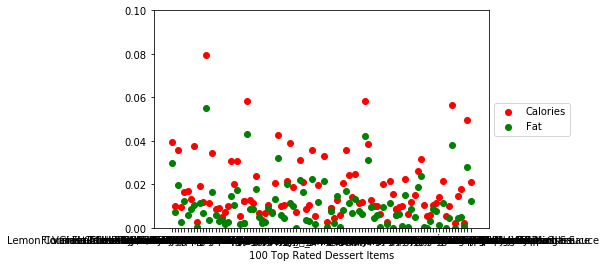

In [242]:
plt.scatter('title', 'calories', data = dessert_top_rated100, color='red', label = 'Calories')
plt.scatter('title', 'fat', data=dessert_top_rated100, color = 'green', label = 'Fat')
plt.xlabel("100 Top Rated Dessert Items")
plt.ylim(0,0.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

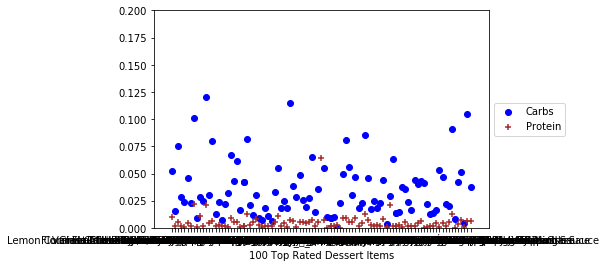

In [245]:
plt.scatter('title', 'carbs', data = dessert_top_rated100, color='blue', label = 'Carbs')
plt.scatter('title', 'protein', data = dessert_top_rated100, color='brown', marker = '+', label = 'Protein')

plt.xlabel("100 Top Rated Dessert Items")
plt.ylim(0,0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))